In [1]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

In [2]:
# car_front = pd.read_csv('./Documents/data_set/Result/67_Ford_Black_front/80_overall.csv')
# car_side = pd.read_csv('./Documents/data_set/Result/99_Fiesta_Purple_side/80_overall.csv')
# car_back = pd.read_csv('./Documents/data_set/Result/26_Ford_Black_back/80_overall.csv')
# pillar = pd.read_csv('./Documents/data_set/Result/Pillar/80_overall.csv')
# human_A = pd.read_csv('./Documents/data_set/Result/Human_A/80_overall.csv')
# human_B = pd.read_csv('./Documents/data_set/Result/Human_B/80_overall.csv')

# car_front_fft = fft_from_data_frame(car_front)
# car_side_fft = fft_from_data_frame(car_side)
# car_back_fft = fft_from_data_frame(car_back)
# pillar_fft = fft_from_data_frame(pillar)
# human_A_fft = fft_from_data_frame(human_A)
# human_B_fft = fft_from_data_frame(human_B)

In [3]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front = glob.glob('../Documents/data_set/Result/67_Ford_Black_front/*_overall.csv')
car_side = glob.glob('../Documents/data_set/Result/99_Fiesta_Purple_side/*_overall.csv')
car_back = glob.glob('../Documents/data_set/Result/26_Ford_Black_back/*_overall.csv')
pillar = glob.glob('../Documents/data_set/Result/Pillar/*_overall.csv')
human_A = glob.glob('../Documents/data_set/Result/Human_A/*_overall.csv')
human_B = glob.glob('../Documents/data_set/Result/Human_B/*_overall.csv')
human_C = glob.glob('../Documents/data_set/Result/Human_C/*_overall.csv')
stopper = glob.glob('../Documents/data_set/Result/Stopper/*_overall.csv')

car_front_fft = get_fft_set(car_front)
car_side_fft = get_fft_set(car_side)
car_back_fft = get_fft_set(car_back)
pillar_fft = get_fft_set(pillar)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
stopper_fft = get_fft_set(stopper)

In [4]:
car = car_front_fft + car_back_fft + car_side_fft
human = human_A_fft + human_B_fft + human_C_fft
X = car + human + pillar_fft + stopper_fft 
y = len(car)*['Car'] + len(human)*['Human'] + len(pillar_fft)*['Pillar'] + len(stopper_fft)*['Stopper'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [5]:
print('X train data : ', np.array(X_train).shape)
print('X test data : ', np.array(X_test).shape)
print('y train data : ', np.array(y_train).shape)
print('y test data : ', np.array(y_test).shape)

X train data :  (11245, 90)
X test data :  (7497, 90)
y train data :  (11245,)
y test data :  (7497,)


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing


normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(23,), random_state=5,activation="relu")
clf.fit(normalized_X_train,y_train)
y_predict = clf.predict(normalized_X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.9230358810190743

In [8]:
from sklearn.model_selection import cross_val_score

for i in range(5,30):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i), random_state=5)
    scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 5 score average 0.7220162059259281
hidden layer 6 score average 0.8202746310626309
hidden layer 7 score average 0.8385090781444259
hidden layer 8 score average 0.8674050695303469
hidden layer 9 score average 0.8306837254144797
hidden layer 10 score average 0.8618027445009431
hidden layer 11 score average 0.84188543304181
hidden layer 12 score average 0.8059586664552159
hidden layer 13 score average 0.8491718870283471
hidden layer 14 score average 0.8522919618585811
hidden layer 15 score average 0.8252499427777474
hidden layer 16 score average 0.8354823965386652
hidden layer 17 score average 0.8502451950847472
hidden layer 18 score average 0.8789708081791553
hidden layer 19 score average 0.8384142904325259
hidden layer 20 score average 0.8395775469334096
hidden layer 21 score average 0.8610941305620067
hidden layer 22 score average 0.8737244815681106
hidden layer 23 score average 0.909380678113092
hidden layer 24 score average 0.8608299118964373
hidden layer 25 score averag

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_train, y_train)
y_predict = clf.predict(normalized_X_test)

# from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.9347739095638256

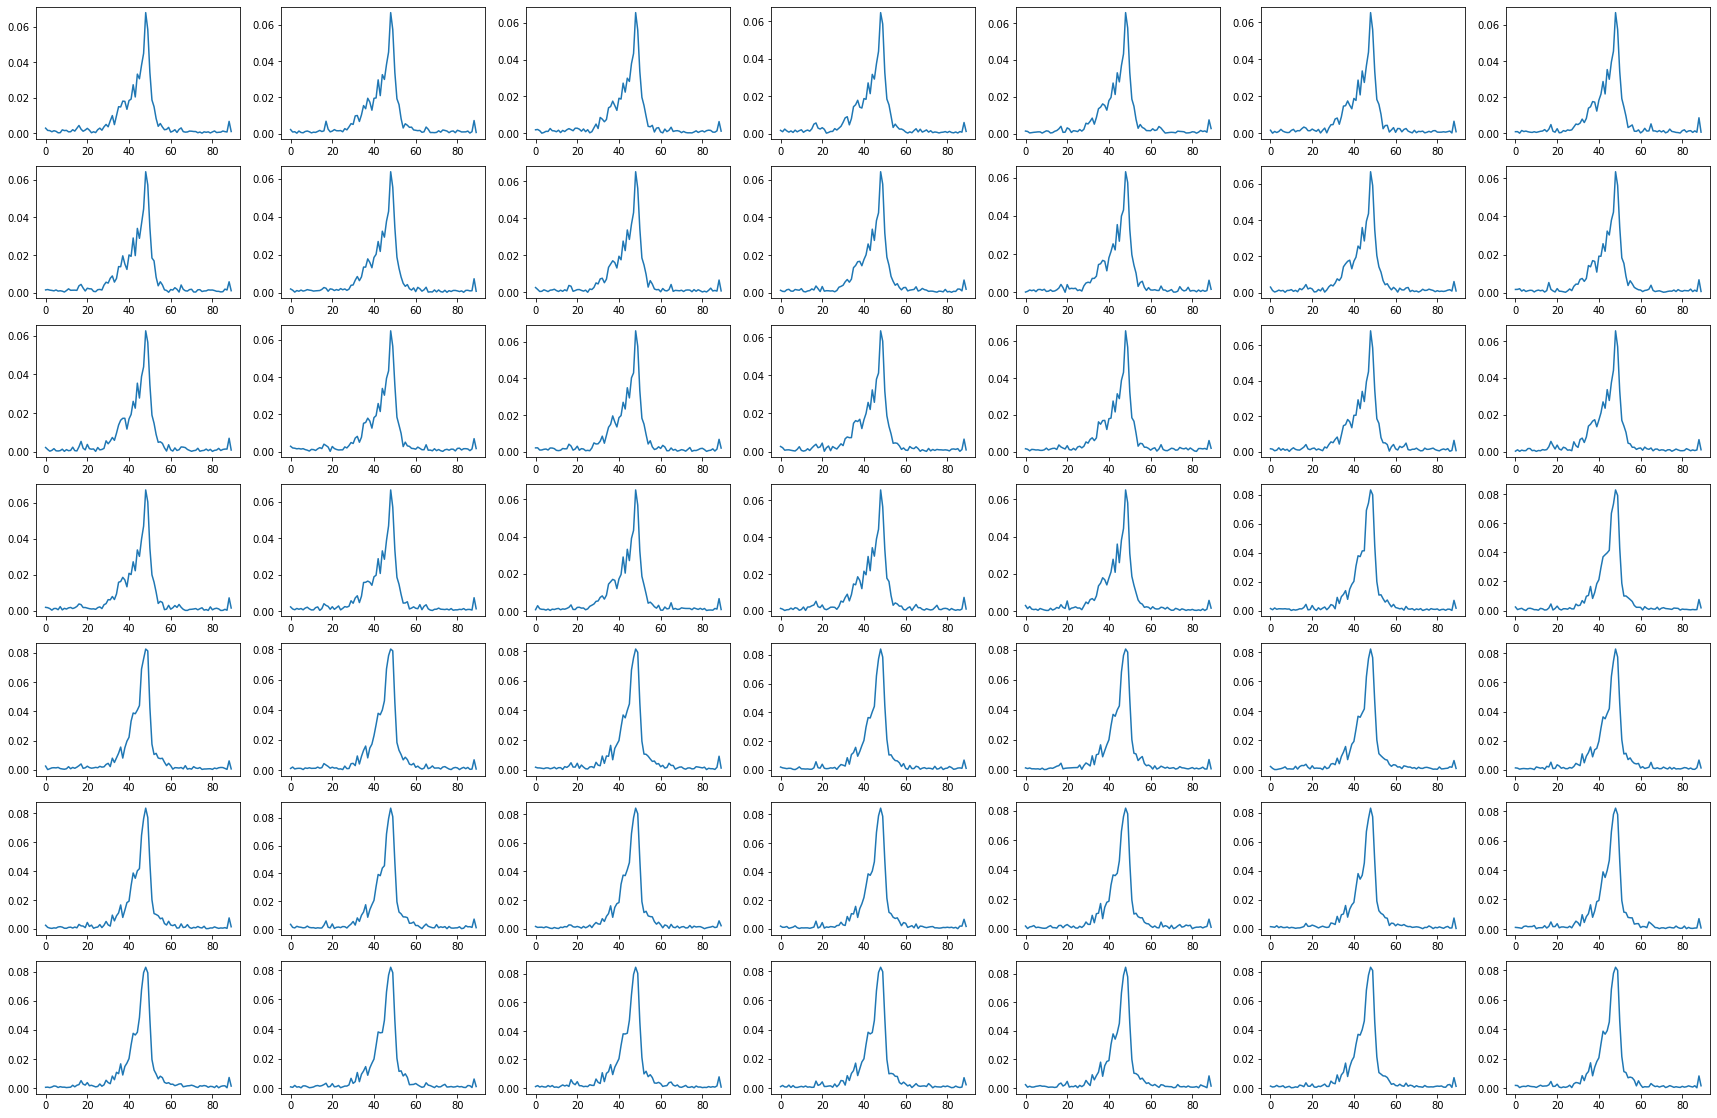

In [10]:
fig = plt.figure(figsize=(30, 20))
for index, data in enumerate(car_front_fft):
    if index < 49:
        ax = fig.add_subplot(7, 7, index+1)
        ax.plot(data)